# Introduction

Today’s machines can analyze more language-based data than humans, without fatigue and in a consistent, unbiased way. Considering the staggering amount of unstructured data, automation will be critical to fully analyze text efficiently. Natural Language Processing is important because it helps to resolve ambiguity in language and adds useful numeric structure to the data for many downstream applications, such as text analytics.

I propose to use the MS Research Project as an opportunity to solve Natural Language Processing task - identify duplicate questions using Quora data set. The project paper will focus on NLP feature engineering, utilising NLP techniques, applying Machine Learning algorithms, tuning them and selecting the best one based on their performance.

Quora is an American question-and-answer social network where questions are asked, answered, and edited by users, either factually or in the form of opinions. Quora is a place to gain and share knowledge. It's a platform to ask questions and connect with people who contribute unique insights and quality answers. Millions of people use Quora every month, and many of them ask similar questions, so finding similar questions can significantly increase the efficiency of using this site.

I would like to make especial emphasis on feature engineering process for this particular project. The importance of feature engineering can hardly be overestimated for unstructured, textual data because we need to convert free flowing text into a numeric representation which can then be understood by machine learning algorithms.

In this project I will classify questions on similar and not similar (binaty classification problem). Because the correct answer would be associated with a group of questions regarded as similar the accuracy of predictions for Quora is quite important. To address this I need to set up high probability threshold.

# Literature Review

Measures of text similarity have been used for a long time in applications in natural language processing and related areas. The typical approach to finding the similarity between two text segments is to use a simple lexical matching method, and produce a similarity score based on the number of lexical units that occur in both input segments[4]. Improvements to this simple method have considered stemming, stop-word removal, part-of-speech tagging, longest subsequence matching, as well as various weighting and normalization factors [5]. While successful to a certain
degree, these lexical matching similarity methods fail to identify the semantic similarity of texts. The only exception to this trend is perhaps the latent semantic analysis (LSA) method [6], which represents an improvement over earlier attempts to use measures of semantic similarity for information retrieval. LSA aims to find similar terms in large text collections, and measure similarity between texts by including these additional related words.
In general words are similar lexically if they have a similar character sequence. Words are similar
semantically if they have the same thing, are opposite of each other, used in the same way, used in the same context and one is a type of another.
Some papers discuss text similarity through partitioning them into three approaches; String-based, Corpus-based and Knowledgebased similarities. Lexical similarity is usually introduced though different String-Based algorithms, Semantic similarity is introduced through Corpus-Based and Knowledge-Based algorithms.[1]

# Methodology

## Data

For this project I propose to use Quora Question Pairs data set from Kaggle website.

Data Set contains the following fields:

id - the id of a training set question pair

qid1, qid2 - unique ids of each question (only available in train.csv)

question1, question2 - the full text of each question

is_duplicate - the target variable, set to 1 if question1 and question2 have essentially the same meaning, and 0 otherwise.

Data Source link:

https://www.kaggle.com/c/quora-question-pairs/data

## ML Algorithms

Feature engineering process will be started with a list of word count statistics called a bag-of-words. For simple tasks such as query similarity, word count statistics often suffice. In bag-of-words (BoW) featurization, a text document is converted into a vector of counts, but a bag-of-words has no sequence; it just remembers how many times each word appears in the text. Bag-of-words is not perfect. Breaking down a sentence into single words can destroy the semantic meaning. Another algorithms that will be tested is Bag-of-n-Grams which alleviates some of the issue of Bag-of-Words but is not a fundamental fix. n-grams retain more of the original sequence structure of the text, and therefore the bag-of-n-grams representation can be more informative[2]. Another algorithm that will be implemented is Tf-idf. Tf-idf is a simple twist on the bag-of-words approach. It stands for term frequency– inverse document frequency. Instead of looking at the raw counts of each word in each document in a dataset, tf-idf looks at a normalized count where each word count is divided by the number of documents this word appears in.
In order to overcome the deficiencies of the algorithms listed above Vector Space Models will be applied, such as 
Latent Semantic Analysis (LSA) and Neural Network based language models. These models allow to compute some statistical measures of how often words occur with their neighboring words in a corpus and then building out dense word vectors for each word from these measures.

Logistic Regression, SVM, XGBoost and Deep Learning models will be trained and tuned in order to solve this classification problem and best performed one will be used to make a prediction for the test set.

### References

[1] - Wael H. Gomaa, Aly A. Fahmy, A Survey of Text Similarity Approaches, International Journal of Computer Applications (0975 – 8887), 2013

[2] - Alice Zheng & Amanda Casari, Feature Engineering for Machine Learning: PRINCIPLES AND TECHNIQUES FOR DATA SCIENTISTS, 2018

[3] -  Voorhees. 1993. Using wordnet to disambiguate word
senses for text retrieval. In Proceedings of the 16th annual
international ACM SIGIR conference, Pittsburgh, PA.

[4] - Salton and M.E. Lesk. Computer evaluation of indexing and text processing. Prentice Hall, Ing. Englewood Cliffs, New Jersey, 1971

[5] - Salton and A. Bukley. Term weighting approaches in automatic text retrieval. In Readings in Information Retrieval. Morgan Kaufmann Publishers, San Francisco, CA, 1997

[6]- K. Landauer, P. Foltz, and D. Laham. Introduction to latent semantic analysis, 1998.



# Data Exploration

Main points to explore:

    - target variable exploration: unique vs duplicate questions pairs (absolute value and %);
    - maximum number of times a single question is repeated;
    - % of questions that appear more than one time;
    - checking if there are any question pair duplicated;
    - each question occurrences distribution


In [240]:
# loading necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline sets the backend of matplotlib to the 'inline' backend (With this backend, the output of 
# plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell 
# that produced it. The resulting plots will then also be stored in the notebook document.)
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
# import os

In [241]:
# reading data
df = pd.read_csv("/Users/Olga/PycharmProjects/data/quora-question-pairs/train.csv")

In [242]:
# checking top 5 rows of the data set
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [243]:
# checking data set dimensions
df.shape

(404290, 6)

Data set contains 404290 rows and 6 columns

In [244]:
# checking data summary
df.describe()

,id,qid1,qid2,is_duplicate
count,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,217243.942418,220955.655337,0.369198
std,116708.614502,157751.700002,159903.182629,0.482588
min,0.000000,1.000000,2.000000,0.000000
25%,101072.250000,74437.500000,74727.000000,0.000000
50%,202144.500000,192182.000000,197052.000000,0.000000
75%,303216.750000,346573.500000,354692.500000,1.000000
max,404289.000000,537932.000000,537933.000000,1.000000


In [245]:
# checking data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404289 non-null object
question2       404288 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


There are missing vlaues in qid1 and qid2: 404289 and 404288 respectively out of 404290.

Target variable exploration: What is the % of duplicate question pairs.

Text(0.5, 1.0, 'Duplicate vs Unique Question Pairs')

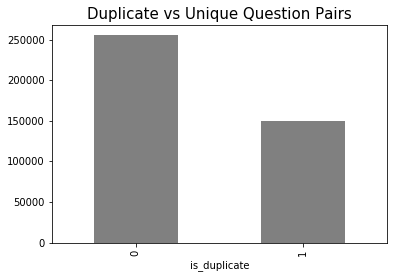

In [246]:
df.groupby("is_duplicate")['id'].count().plot.bar(color="grey").set_title('Duplicate vs Unique Question Pairs', fontsize=15)

In [247]:
# finding % of duplicate and unique question pairs
round(df['is_duplicate'].mean()*100,0)

37.0

There are 37% of duplicate and 63% of unique question pairs in the training data set.


In [248]:
# number of questions that appear more than one time in the data set
total_q = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
q_more_than_one = np.sum(total_q.value_counts()>1)
q_more_than_one

111780

In [249]:
# % of questions that appear more than one time in the data set
round(q_more_than_one/len(np.unique(total_q))*100,1)

20.8

In [250]:
# maximum number of times a single question is repeated in the data set
max(total_q.value_counts())

157

In [251]:
# ckecking if there are any repeated pairs of questions
pair_dupl = df[['qid1','qid2','is_duplicate']].groupby(['qid1','qid2']).count()
pair_dupl.shape[0] - df.shape[0]

0

Text(0, 0.5, 'Number of Questions')

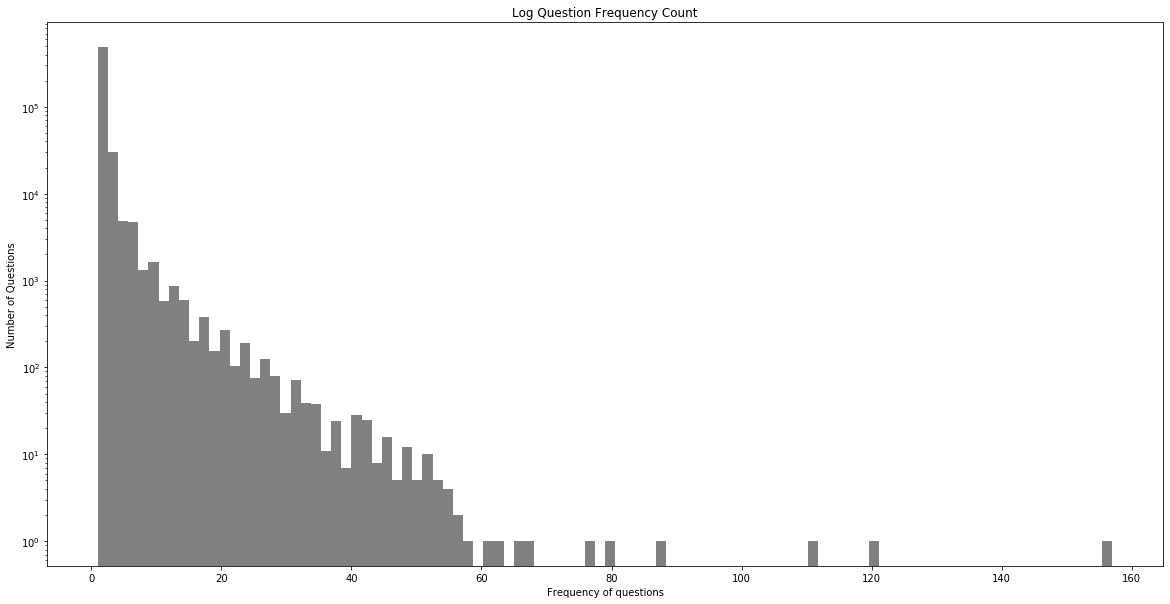

In [256]:
# Number of occurrences of each question
plt.figure(figsize = (20,10))
plt.hist(total_q.value_counts(), bins = 100, color="grey")
plt.yscale('log')
plt.title ("Log Question Frequency Count")
plt.xlabel('Frequency of questions')
plt.ylabel('Number of Questions')

### Exploring Most Frequent Words in Duplicate and Non-duplicate Question Pairs

In [257]:
df_duplicate = df[df['is_duplicate'] == 1]
dfp_nonduplicate = df[df['is_duplicate'] == 0]

In [258]:
# Converting 2d array of q1 and q2 and flatten the array: like {{1,2},{3,4}} to {1,2,3,4}
dupl = np.dstack([df_duplicate["question1"], df_duplicate["question2"]]).flatten()
unique = np.dstack([dfp_nonduplicate["question1"], dfp_nonduplicate["question2"]]).flatten()

In [259]:
#Saving the np array into a text file
np.savetxt('/Users/Olga/train_dup_q.txt', dupl, delimiter=' ', fmt='%s')
np.savetxt('/Users/Olga/train_un_q.txt', unique, delimiter=' ', fmt='%s')

In [260]:
# reading the text files and removing the Stop Words:
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

text_dup_q = open('/Users/Olga/train_dup_q.txt').read()
textn_un_q = open('/Users/Olga/train_un_q.txt').read()

Word Cloud for Duplicate Question pairs

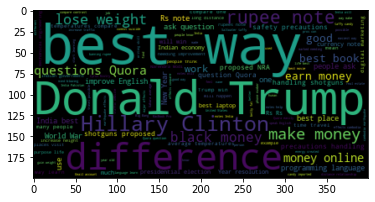

In [261]:
wc = WordCloud(max_words=len(text_dup_q))
wc.generate(text_dup_q)
plt.imshow(wc, interpolation='bilinear')
plt.show()

Word Cloud for non-Duplicate Question pairs

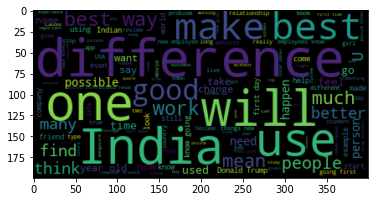

In [262]:
wc = WordCloud(max_words=len(textn_un_q))
wc.generate(textn_un_q)
plt.imshow(wc, interpolation='bilinear')
plt.show()

# Data Preparation

### Missing Vlaues Check

In [263]:
# checking missing values
df[df.isnull().any(1)]

,id,qid1,qid2,question1,question2,is_duplicate
105780,105780,174363,174364,How can I develop android app?,NaN,0
201841,201841,303951,174364,How can I create an Android app?,NaN,0
363362,363362,493340,493341,NaN,My Chinese name is Haichao Yu. What English na...,0


In [264]:
# replacing NULL values with space
df = df.fillna('')
df[df.isnull().any(1)]

,id,qid1,qid2,question1,question2,is_duplicate


### Preprocessing of Text 

- Removing html tags
- Removing Punctuations
- Performing stemming
- Removing Stopwords
- Expanding contractions etc.

In [265]:
a = 0 
for i in range(a,a+10):
    print(df.question1[i])
    print(df.question2[i])
    print()

What is the step by step guide to invest in share market in india?
What is the step by step guide to invest in share market?

What is the story of Kohinoor (Koh-i-Noor) Diamond?
What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?

How can I increase the speed of my internet connection while using a VPN?
How can Internet speed be increased by hacking through DNS?

Why am I mentally very lonely? How can I solve it?
Find the remainder when [math]23^{24}[/math] is divided by 24,23?

Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?
Which fish would survive in salt water?

Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?
I'm a triple Capricorn (Sun, Moon and ascendant in Capricorn) What does this say about me?

Should I buy tiago?
What keeps childern active and far from phone and video games?

How can I be a good geologist?
What should I do to be a great geologist?

When do you use シ instea

In [266]:
# source: https://www.kaggle.com/currie32/the-importance-of-cleaning-text

SPECIAL_TOKENS = {
    'quoted': 'quoted_item',
    'non-ascii': 'non_ascii_word',
    'undefined': 'something'
}

def clean(text, stem_words=True):
    import re
    from string import punctuation
    from nltk.stem import SnowballStemmer
    from nltk.corpus import stopwords
    
    def pad_str(s):
        return ' '+s+' '
    
    if pd.isnull(text):
        return ''

    stops = set(stopwords.words("english"))
    # Clean the text, with the option to stem words.
    
    # Empty question
    
    if type(text) != str or text=='':
        return ''

    # Clean the text
    text = re.sub("\'s", " ", text) # we have cases like "Sam is" or "Sam's" (i.e. his) these two cases aren't separable, I choose to compromise are kill "'s" directly
    text = re.sub(" whats ", " what is ", text, flags=re.IGNORECASE)
    text = re.sub("\'ve", " have ", text)
    text = re.sub("can't", "can not", text)
    text = re.sub("n't", " not ", text)
    text = re.sub("i'm", "i am", text, flags=re.IGNORECASE)
    text = re.sub("\'re", " are ", text)
    text = re.sub("\'d", " would ", text)
    text = re.sub("\'ll", " will ", text)
    text = re.sub("e\.g\.", " eg ", text, flags=re.IGNORECASE)
    text = re.sub("b\.g\.", " bg ", text, flags=re.IGNORECASE)
    text = re.sub("(\d+)(kK)", " \g<1>000 ", text)
    text = re.sub("e-mail", " email ", text, flags=re.IGNORECASE)
    text = re.sub("(the[\s]+|The[\s]+)?U\.S\.A\.", " America ", text, flags=re.IGNORECASE)
    text = re.sub("(the[\s]+|The[\s]+)?United State(s)?", " America ", text, flags=re.IGNORECASE)
    text = re.sub("\(s\)", " ", text, flags=re.IGNORECASE)
    text = re.sub("[c-fC-F]\:\/", " disk ", text)
    
    # remove comma between numbers, i.e. 15,000 -> 15000
    
    text = re.sub('(?<=[0-9])\,(?=[0-9])', "", text)

    
    # add padding to punctuations and special chars, we still need them later
    
    text = re.sub('\$', " dollar ", text)
    text = re.sub('\%', " percent ", text)
    text = re.sub('\&', " and ", text)
     
        
    text = re.sub('[^\x00-\x7F]+', pad_str(SPECIAL_TOKENS['non-ascii']), text) # replace non-ascii word with special word
    
    # indian dollar
    
    text = re.sub("(?<=[0-9])rs ", " rs ", text, flags=re.IGNORECASE)
    text = re.sub(" rs(?=[0-9])", " rs ", text, flags=re.IGNORECASE)
    
    # clean text rules get from : https://www.kaggle.com/currie32/the-importance-of-cleaning-text
    text = re.sub(r" (the[\s]+|The[\s]+)?US(A)? ", " America ", text)
    text = re.sub(r" UK ", " England ", text, flags=re.IGNORECASE)
    text = re.sub(r" india ", " India ", text)
    text = re.sub(r" switzerland ", " Switzerland ", text)
    text = re.sub(r" china ", " China ", text)
    text = re.sub(r" chinese ", " Chinese ", text) 
    text = re.sub(r" imrovement ", " improvement ", text, flags=re.IGNORECASE)
    text = re.sub(r" intially ", " initially ", text, flags=re.IGNORECASE)
    text = re.sub(r" quora ", " Quora ", text, flags=re.IGNORECASE)
    text = re.sub(r" dms ", " direct messages ", text, flags=re.IGNORECASE)  
    text = re.sub(r" demonitization ", " demonetization ", text, flags=re.IGNORECASE) 
    text = re.sub(r" actived ", " active ", text, flags=re.IGNORECASE)
    text = re.sub(r" kms ", " kilometers ", text, flags=re.IGNORECASE)
    text = re.sub(r" cs ", " computer science ", text, flags=re.IGNORECASE) 
    text = re.sub(r" upvote", " up vote", text, flags=re.IGNORECASE)
    text = re.sub(r" iPhone ", " phone ", text, flags=re.IGNORECASE)
    text = re.sub(r" \0rs ", " rs ", text, flags=re.IGNORECASE)
    text = re.sub(r" calender ", " calendar ", text, flags=re.IGNORECASE)
    text = re.sub(r" ios ", " operating system ", text, flags=re.IGNORECASE)
    text = re.sub(r" gps ", " GPS ", text, flags=re.IGNORECASE)
    text = re.sub(r" gst ", " GST ", text, flags=re.IGNORECASE)
    text = re.sub(r" programing ", " programming ", text, flags=re.IGNORECASE)
    text = re.sub(r" bestfriend ", " best friend ", text, flags=re.IGNORECASE)
    text = re.sub(r" dna ", " DNA ", text, flags=re.IGNORECASE)
    text = re.sub(r" III ", " 3 ", text)
    text = re.sub(r" banglore ", " Banglore ", text, flags=re.IGNORECASE)
    text = re.sub(r" J K ", " JK ", text, flags=re.IGNORECASE)
    text = re.sub(r" J\.K\. ", " JK ", text, flags=re.IGNORECASE)
    
    # replace the float numbers with a random number, it will be parsed as number afterward, and also been replaced with word "number"
    
    text = re.sub('[0-9]+\.[0-9]+', " 87 ", text)
  
    
    # Remove punctuation from text
    text = ''.join([c for c in text if c not in punctuation]).lower()
       # Return a list of words
    return text
    
df['question1'] = df['question1'].apply(clean)
df['question2'] = df['question2'].apply(clean)

In [215]:
a = 0 
for i in range(a,a+10):
    print(df.question1[i])
    print(df.question2[i])
    print()

what is the step by step guide to invest in share market in india
what is the step by step guide to invest in share market

what is the story of kohinoor kohinoor diamond
what would happen if the indian government stole the kohinoor kohinoor diamond back

how can i increase the speed of my internet connection while using a vpn
how can internet speed be increased by hacking through dns

why am i mentally very lonely how can i solve it
find the remainder when math2324math is divided by 2423

which one dissolve in water quikly sugar salt methane and carbon di oxide
which fish would survive in salt water

astrology i am a capricorn sun cap moon and cap risingwhat does that say about me
i am a triple capricorn sun moon and ascendant in capricorn what does this say about me

should i buy tiago
what keeps childern active and far from phone and video games

how can i be a good geologist
what should i do to be a great geologist

when do you use  nonasciiword  instead of  nonasciiword 
when do y

### Feature Engineering


- FuzzyWzzy

Fuzzywuzzy is a Python library uses Levenshtein Distance to calculate the differences between sequences in a simple-to-use package.

There are several ways to compare two strings in Fuzzywuzzy and all of them will be applied:

 -- ratio , compares the entire string similarity, in order. It is considered, the naive approach is far too sensitive to minor differences in word order, missing or extra words, and other such issues.

 -- partial_ratio , compares partial string similarity. 
 
 -- token_sort_ratio , ignores word order.
 
 -- token_set_ratio , ignores duplicated words. It is similar with token sort ratio, but a little bit more flexible. 



- Bag-Of-Words


In bag-of-words (BoW) featurization, a text document is converted into a vector of counts. Bag-of-words converts a text document into a flat vector.  It is “flat” because it doesn’t contain any of the original textual structures. The original text is a sequence of words. But a bag-of-words has no sequence; it just remembers how many times each word appears in the text. 


- Tf-idf

Tf-idf is a simple twist on the bag-of-words approach. It stands for term frequency– inverse document frequency. Instead of looking at the raw counts of each word in each document in a dataset, tf-idf looks at a normalized count where each word count is divided by the number of documents this word appears in.
TF is good for text similarity in general, while TF-IDF is good for search query relevance.



- Vector Space Models (VSMs): LSA


Word2Vec Model (Vector Space Models (VSMs) in such a way that we can embed word vectors in this continuous vector space based on semantic and contextual similarity. In fact the distributional hypothesis in the field of distributional semantics tells us that words which occur and are used in the same context, are semantically similar to one another and have similar meanings.)


In [267]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0
1,1,3,4,what is the story of kohinoor kohinoor diamond,what would happen if the indian government sto...,0
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when math2324math is divide...,0
4,4,9,10,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,0


In [268]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

df["token_set_ratio"]       = df.apply(lambda x: fuzz.token_set_ratio(x["question1"], x["question2"]), axis=1)
# The token sort approach involves tokenizing the string in question, sorting the tokens alphabetically, and 
# then joining them back into a string We then compare the transformed strings with a simple ratio().
df["token_sort_ratio"]      = df.apply(lambda x: fuzz.token_sort_ratio(x["question1"], x["question2"]), axis=1)
df["fuzz_ratio"]            = df.apply(lambda x: fuzz.QRatio(x["question1"], x["question2"]), axis=1)
df["fuzz_partial_ratio"]    = df.apply(lambda x: fuzz.partial_ratio(x["question1"], x["question2"]), axis=1)

In [275]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,100,93,93,100
1,1,3,4,what is the story of kohinoor kohinoor diamond,what would happen if the indian government sto...,0,81,62,64,72
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,63,63,43,46
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when math2324math is divide...,0,26,25,8,10
4,4,9,10,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,0,67,47,36,55


#### XGboost + FuzzyWuzzy

In [288]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.feature_extraction.text import CountVectorizer
import scipy 

X_train,X_valid,y_train,y_valid = train_test_split(X, y, stratify=y, test_size=0.3)


xgb_model = xgb.XGBClassifier(max_depth=50, n_estimators=80, learning_rate=0.1, colsample_bytree=.7, gamma=0, reg_alpha=4, objective='binary:logistic', eta=0.3, silent=1, subsample=0.8).fit(X_train, y_train) 
xgb_prediction = xgb_model.predict(X_valid)
print('training score:', f1_score(y_train, xgb_model.predict(X_train), average='macro'))
print('validation score:', f1_score(y_valid, xgb_model.predict(X_valid), average='macro'))
print(classification_report(y_valid, xgb_prediction))


training score: 0.8308213808707585
word level tf-idf validation score: 0.7611533987613173
              precision    recall  f1-score   support

           0       0.79      0.90      0.84     76508
           1       0.78      0.60      0.68     44779

    accuracy                           0.79    121287
   macro avg       0.79      0.75      0.76    121287
weighted avg       0.79      0.79      0.78    121287



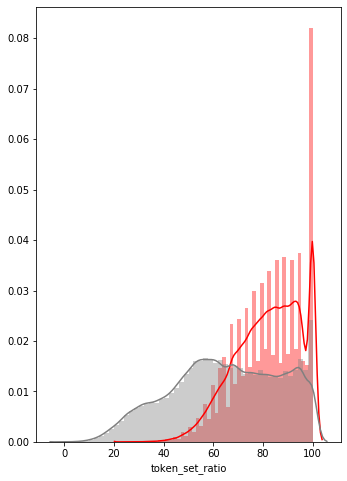

In [289]:
# checking 'token_set_ratio'
plt.figure(figsize=(12, 8))

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['token_set_ratio'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['token_set_ratio'][0:] , label = "0" , color = 'grey' )
plt.show()

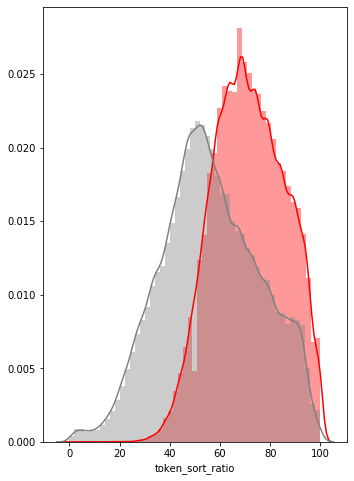

In [231]:
# checking 'token_sort_ratio'
plt.figure(figsize=(12, 8))

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['token_sort_ratio'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['token_sort_ratio'][0:] , label = "0" , color = 'grey' )
plt.show()

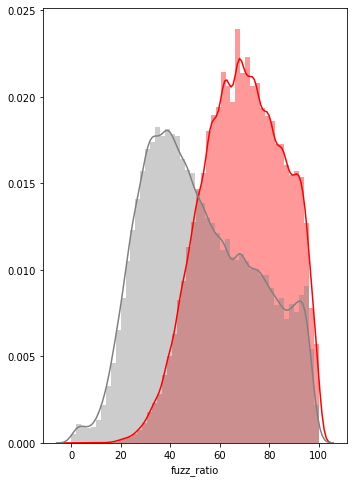

In [232]:
# checking 'fuzz_ratio'
plt.figure(figsize=(12, 8))

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['fuzz_ratio'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['fuzz_ratio'][0:] , label = "0" , color = 'grey' )
plt.show()

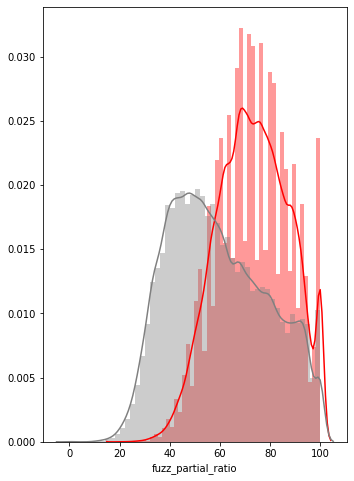

In [233]:
# checking 'fuzz_partial_ratio'
plt.figure(figsize=(12, 8))

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['fuzz_partial_ratio'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['fuzz_partial_ratio'][0:] , label = "0" , color = 'grey' )
plt.show()

#### XGboost + Bag of words

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import scipy 
import xgboost as xgb

count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(pd.concat((df['question1'],df['question2'])).unique())
trainq1_trans = count_vect.transform(df['question1'].values)
trainq2_trans = count_vect.transform(df['question2'].values)
labels = df['is_duplicate'].values
X = scipy.sparse.hstack((trainq1_trans,trainq2_trans))
y = labels
X_train,X_valid,y_train,y_valid = train_test_split(X,y, test_size = 0.33, random_state = 42)

xgb_model = xgb.XGBClassifier(max_depth=50, n_estimators=80, learning_rate=0.1, colsample_bytree=.7, gamma=0, reg_alpha=4, objective='binary:logistic', eta=0.3, silent=1, subsample=0.8).fit(X_train, y_train) 
xgb_prediction = xgb_model.predict(X_valid)

from sklearn.metrics import f1_score, classification_report, accuracy_score

print('training score:', f1_score(y_train, xgb_model.predict(X_train), average='macro'))
print('validation score:', f1_score(y_valid, xgb_model.predict(X_valid), average='macro'))
print(classification_report(y_valid, xgb_prediction))

training score: 0.832289528208112
validation score: 0.7605439049757102
              precision    recall  f1-score   support

           0       0.79      0.90      0.84     83975
           1       0.78      0.60      0.68     49441

    accuracy                           0.79    133416
   macro avg       0.79      0.75      0.76    133416
weighted avg       0.79      0.79      0.78    133416



#### XGboost + TF-Idf

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(pd.concat((df['question1'],df['question2'])).unique())
trainq1_trans = tfidf_vect.transform(df['question1'].values)
trainq2_trans = tfidf_vect.transform(df['question2'].values)
labels = df['is_duplicate'].values
X = scipy.sparse.hstack((trainq1_trans,trainq2_trans))
y = labels
X_train,X_valid,y_train,y_valid = train_test_split(X,y, test_size = 0.33, random_state = 42)

xgb_model = xgb.XGBClassifier(max_depth=50, n_estimators=80, learning_rate=0.1, colsample_bytree=.7, gamma=0, reg_alpha=4, objective='binary:logistic', eta=0.3, silent=1, subsample=0.8).fit(X_train, y_train) 
xgb_prediction = xgb_model.predict(X_valid)
print('word level tf-idf training score:', f1_score(y_train, xgb_model.predict(X_train), average='macro'))
print('word level tf-idf validation score:', f1_score(y_valid, xgb_model.predict(X_valid), average='macro'))
print(classification_report(y_valid, xgb_prediction))

word level tf-idf training score: 0.8930476429377966
word level tf-idf validation score: 0.7615175836018981
              precision    recall  f1-score   support

           0       0.79      0.90      0.84     83975
           1       0.78      0.61      0.68     49441

    accuracy                           0.79    133416
   macro avg       0.79      0.75      0.76    133416
weighted avg       0.79      0.79      0.78    133416

